<a href="https://colab.research.google.com/github/lgiesen/forest_height/blob/main/archive/random_forest-grid_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# the zipped data is uploaded in the root_path folder
root_path = 'drive/MyDrive/Colab Notebooks/data/'
path_images = f'{root_path}images/'
path_masks = f'{root_path}masks/'
user = "lgiesen"
repo = "forest_height"
!git clone https://github.com/{user}/{repo}.git

Cloning into 'forest_height'...
remote: Enumerating objects: 367, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 367 (delta 6), reused 8 (delta 1), pack-reused 348
Receiving objects: 100% (367/367), 20.53 MiB | 16.27 MiB/s, done.
Resolving deltas: 100% (197/197), done.


Load dataset

In [5]:
import pandas as pd
import numpy as np
forest_data = "forest_height/data/"
data_type = "color_channels_ndvi"
X_train = np.array(pd.read_pickle(f"{forest_data}{data_type}/X_train.pkl"))
y_train = np.array(pd.read_pickle(f"{forest_data}{data_type}/y_train.pkl"))
X_test = np.array(pd.read_pickle(f"{forest_data}{data_type}/X_test.pkl"))
y_test = np.array(pd.read_pickle(f"{forest_data}{data_type}/y_test.pkl"))

Random Search

In [6]:
import numpy as np
# Number of trees in random forest
n_estimators = [100, 200, 300, 400, 500] #[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 100, num = 11)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': ['absolute_error'],
               'bootstrap': bootstrap}

In [8]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
# initialize model
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions = random_grid,
    scoring="neg_mean_absolute_error", # strategy to evaluate the performance
    n_iter=50,
    cv=3, # k-fold cross-validation
    verbose=3, # the higher, the more messages
    random_state=42,
    #  # use all processors
    return_train_score=True)

# train model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3] END bootstrap=True, criterion=absolute_error, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=(train=-9.868, test=-10.094) total time=  36.6s
[CV 2/3] END bootstrap=True, criterion=absolute_error, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=(train=-9.951, test=-9.941) total time=  33.5s
[CV 3/3] END bootstrap=True, criterion=absolute_error, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=(train=-9.990, test=-9.855) total time=  33.2s
[CV 1/3] END bootstrap=True, criterion=absolute_error, max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=-5.842, test=-10.289) total time=  38.7s
[CV 2/3] END bootstrap=True, criterion=absolute_error, max_depth=50, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_esti

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, criterion=absolute_error, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=(train=-7.240, test=-10.298) total time= 3.3min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, criterion=absolute_error, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=(train=-7.317, test=-10.113) total time= 3.6min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, criterion=absolute_error, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=(train=-7.365, test=-10.051) total time= 2.9min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, criterion=absolute_error, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-4.992, test=-10.399) total time= 1.6min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, criterion=absolute_error, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-5.122, test=-10.144) total time= 1.9min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, criterion=absolute_error, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-5.091, test=-10.170) total time= 1.6min
[CV 1/3] END bootstrap=True, criterion=absolute_error, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=(train=-8.937, test=-10.120) total time=  28.7s
[CV 2/3] END bootstrap=True, criterion=absolute_error, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=(train=-9.002, test=-9.899) total time=  27.9s
[CV 3/3] END bootstrap=True, criterion=absolute_error, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=(train=-8.933, test=-9.859) total time=  26.3s
[CV 1/3] END bootstrap=True, criterion=absolute_error, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=15, n_estimators=300;, score=(train=-7.289, test=-10.218) total time

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, criterion=absolute_error, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=(train=-7.700, test=-10.173) total time= 6.2min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, criterion=absolute_error, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=(train=-7.819, test=-9.970) total time= 6.7min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, criterion=absolute_error, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=(train=-7.806, test=-9.931) total time= 5.6min
[CV 1/3] END bootstrap=False, criterion=absolute_error, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=-2.518, test=-10.509) total time= 4.1min
[CV 2/3] END bootstrap=False, criterion=absolute_error, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=-2.555, test=-10.218) total time= 4.1min
[CV 3/3] END bootstrap=False, criterion=absolute_error, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=(train=-2.578, test=-10.270) total time= 3.9min
[CV 1/3] END bootstrap=False, criterion=absolute_error, max_depth=80, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=500;, score=(train=-6.121, test=-10.315) total 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, criterion=absolute_error, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=(train=-4.243, test=-12.563) total time=12.1min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, criterion=absolute_error, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=(train=-4.350, test=-12.505) total time=12.3min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, criterion=absolute_error, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=400;, score=(train=-4.358, test=-12.455) total time=11.9min
[CV 1/3] END bootstrap=False, criterion=absolute_error, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=(train=-2.737, test=-10.693) total time= 7.1min
[CV 2/3] END bootstrap=False, criterion=absolute_error, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=(train=-2.730, test=-10.453) total time= 7.0min
[CV 3/3] END bootstrap=False, criterion=absolute_error, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=(train=-2.758, test=-10.506) total time= 6.6min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, criterion=absolute_error, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=500;, score=(train=-6.854, test=-11.972) total time=14.6min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, criterion=absolute_error, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=500;, score=(train=-6.743, test=-11.777) total time=15.0min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, criterion=absolute_error, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=500;, score=(train=-6.863, test=-12.061) total time=14.4min
[CV 1/3] END bootstrap=True, criterion=absolute_error, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=500;, score=(train=-9.020, test=-10.114) total time= 2.4min
[CV 2/3] END bootstrap=True, criterion=absolute_error, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=500;, score=(train=-9.103, test=-9.916) total time= 2.4min
[CV 3/3] END bootstrap=True, criterion=absolute_error, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=500;, score=(train=-9.058, test=-9.860) total time= 2.2min
[CV 1/3] END bootstrap=False, criterion=absolute_error, max_depth=80, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=(train=-5.481, test=-10.379) tota

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, criterion=absolute_error, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=(train=-6.284, test=-12.171) total time= 3.0min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, criterion=absolute_error, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=(train=-6.279, test=-12.067) total time= 3.0min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, criterion=absolute_error, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=100;, score=(train=-6.413, test=-12.047) total time= 3.0min
[CV 1/3] END bootstrap=False, criterion=absolute_error, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=(train=-6.752, test=-10.233) total time= 2.5min
[CV 2/3] END bootstrap=False, criterion=absolute_error, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=(train=-6.782, test=-9.986) total time= 2.4min
[CV 3/3] END bootstrap=False, criterion=absolute_error, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=(train=-6.793, test=-9.983) total time= 2.4min
[CV 1/3] END bootstrap=True, criterion=absolute_error, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=(train=-7.730, test=-10.169) total 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=400;, score=(train=-8.691, test=-10.797) total time=10.2min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=400;, score=(train=-8.653, test=-10.598) total time=10.3min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=400;, score=(train=-8.495, test=-10.900) total time=10.2min
[CV 1/3] END bootstrap=True, criterion=absolute_error, max_depth=80, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=(train=-7.823, test=-10.184) total time=  33.2s
[CV 2/3] END bootstrap=True, criterion=absolute_error, max_depth=80, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=(train=-7.870, test=-10.017) total time=  33.7s
[CV 3/3] END bootstrap=True, criterion=absolute_error, max_depth=80, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=(train=-7.913, test=-9.949) total time=  30.7s
[CV 1/3] END bootstrap=True, criterion=absolute_error, max_depth=90, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=-5.624, test=-10.389) total

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=(train=-8.789, test=-10.139) total time= 2.7min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=(train=-8.927, test=-9.902) total time= 2.9min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, criterion=absolute_error, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=(train=-8.877, test=-9.880) total time= 2.6min
[CV 1/3] END bootstrap=False, criterion=absolute_error, max_depth=70, max_features=log2, min_samples_leaf=1, min_samples_split=15, n_estimators=300;, score=(train=-5.200, test=-10.458) total time= 4.1min
[CV 2/3] END bootstrap=False, criterion=absolute_error, max_depth=70, max_features=log2, min_samples_leaf=1, min_samples_split=15, n_estimators=300;, score=(train=-5.262, test=-10.197) total time= 4.0min
[CV 3/3] END bootstrap=False, criterion=absolute_error, max_depth=70, max_features=log2, min_samples_leaf=1, min_samples_split=15, n_estimators=300;, score=(train=-5.276, test=-10.234) total time= 3.9min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, criterion=absolute_error, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=(train=-6.241, test=-10.344) total time= 3.3min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, criterion=absolute_error, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=(train=-6.301, test=-10.136) total time= 3.5min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, criterion=absolute_error, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=(train=-6.366, test=-10.119) total time= 3.0min
[CV 1/3] END bootstrap=False, criterion=absolute_error, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=(train=-2.910, test=-10.592) total time= 6.9min
[CV 2/3] END bootstrap=False, criterion=absolute_error, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=(train=-2.972, test=-10.294) total time= 6.9min
[CV 3/3] END bootstrap=False, criterion=absolute_error, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=(train=-3.049, test=-10.345) total time= 6.5min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, criterion=absolute_error, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=(train=-9.857, test=-10.093) total time= 1.7min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, criterion=absolute_error, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=(train=-9.943, test=-9.938) total time= 1.7min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, criterion=absolute_error, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=(train=-9.971, test=-9.856) total time= 1.7min
[CV 1/3] END bootstrap=False, criterion=absolute_error, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-2.529, test=-10.511) total time= 1.4min
[CV 2/3] END bootstrap=False, criterion=absolute_error, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-2.528, test=-10.219) total time= 1.4min
[CV 3/3] END bootstrap=False, criterion=absolute_error, max_depth=40, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-2.593, test=-10.272) total time= 1.3min
[CV 1/3] END bootstrap=True, criterion=absolute_error, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300;, score=(train=-7.807, test=-10.172) total

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, criterion=absolute_error, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=(train=-9.868, test=-10.095) total time= 2.9min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, criterion=absolute_error, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=(train=-9.953, test=-9.942) total time= 3.0min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, criterion=absolute_error, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=400;, score=(train=-9.985, test=-9.858) total time= 2.9min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, criterion=absolute_error, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=-4.831, test=-12.615) total time= 3.1min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, criterion=absolute_error, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=-4.798, test=-12.439) total time= 3.1min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, criterion=absolute_error, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=-4.858, test=-12.355) total time= 3.0min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, criterion=absolute_error, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=(train=-6.332, test=-10.274) total time= 5.0min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, criterion=absolute_error, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=(train=-6.383, test=-10.081) total time= 5.5min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, criterion=absolute_error, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300;, score=(train=-6.402, test=-10.078) total time= 4.5min
[CV 1/3] END bootstrap=True, criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-8.811, test=-10.106) total time=  29.0s
[CV 2/3] END bootstrap=True, criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-8.916, test=-9.922) total time=  29.2s
[CV 3/3] END bootstrap=True, criterion=absolute_error, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=-8.830, test=-9.881) total time=  26.5s
[CV 1/3] END bootstrap=True, criterion=absolute_error, max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=400;, score=(train=-7.661, test=-10.156) total tim

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=True, criterion=absolute_error, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=(train=-6.366, test=-10.283) total time= 8.2min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=True, criterion=absolute_error, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=(train=-6.472, test=-10.068) total time= 9.2min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=True, criterion=absolute_error, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=(train=-6.479, test=-10.072) total time= 7.4min
[CV 1/3] END bootstrap=True, criterion=absolute_error, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=-9.868, test=-10.097) total time=   7.2s
[CV 2/3] END bootstrap=True, criterion=absolute_error, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=-9.952, test=-9.943) total time=   6.1s
[CV 3/3] END bootstrap=True, criterion=absolute_error, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=(train=-9.989, test=-9.856) total time=   7.1s
[CV 1/3] END bootstrap=True, criterion=absolute_error, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=(train=-7.743, test=-10.160) total time=

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 1/3] END bootstrap=False, criterion=absolute_error, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=(train=-5.986, test=-12.122) total time=11.7min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 2/3] END bootstrap=False, criterion=absolute_error, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=(train=-5.993, test=-11.896) total time=12.1min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV 3/3] END bootstrap=False, criterion=absolute_error, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=400;, score=(train=-6.097, test=-12.200) total time=11.5min
CPU times: user 8h 30min 55s, sys: 14 s, total: 8h 31min 9s
Wall time: 8h 33min 21s


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['absolute_error'],
                                        'max_depth': [1, 10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=3)

In [9]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'absolute_error',
 'bootstrap': True}

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'absolute_error',
 'bootstrap': True}

In [12]:
%run /content/forest_height/src/evaluate_model.py

In [13]:
# predict test set
y_pred = rf_random.predict(X_test)
mae_color_channels_ndvi, mse_color_channels_ndvi, rmse_color_channels_ndvi, mape_color_channels_ndvi = evaluate_model(y_test, y_pred)

MAE: 10.078855096408962; MSE: 138.01920139363855; RMSE: 11.74815736163074; MAPE: 1.28021989725682


In [26]:
import joblib
%cd forest_height/models
# save model
joblib.dump(rf_random, 'random_forest_random_search.joblib')
# load model with:
%cd ../../
# rf_random = joblib.load("forest_height/models/random_forest_random_search.joblib")

/content/forest_height/models
/content


In [39]:
X_test[:,10].shape

IndexError: ignored

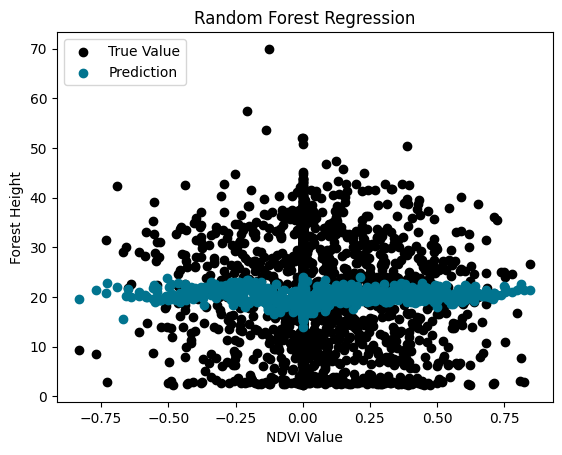

In [49]:
from matplotlib import pyplot as plt
# only the NDVI channel is plotted on the x-axis
# because 11-dimensional data cannot be visualized for humans
fig, ax = plt.subplots()
plt.scatter(X_test[:,10], y_test, color = 'black')
plt.scatter(X_test[:,10], y_pred, color = '#01748F')
plt.title('Random Forest Regression')
plt.xlabel('NDVI Value')
plt.ylabel('Forest Height')
ax.legend(("True Value", "Prediction"), loc='upper left')
plt.show()

# todo: feature importance:

In [ ]:
import matplotlib.pyplot as plt
# get importance
importance = rf_random.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
# rerun this cell
sort = rf.feature_importances_.argsort()
plt.barh(X_train.feature_names[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }
# Create a based model
rf = RandomForestRegressor()# Instantiate the grid search model
grid_search = GridSearchCV(
    estimator = rf,
    param_grid = random_grid,
    cv = 3,
    n_jobs = -1,
    verbose = 3)

In [ ]:
%%time
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)
grid_accuracy = evaluate(best_grid, test_features, test_labels)

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor
# initialize model
rf = RandomForestRegressor(rf_random.best_params_, random_state=42)

# train model
rf.fit(X_train, y_train)

Save model

In [ ]:
X_test = X_test.reshape(-1, 1)

In [ ]:
base_accuracy = evaluate(rf_random, X_test, y_test)

In [ ]:
y_pred = rf_random.predict(X_test)

Visualize prediction

In [ ]:
%run forest_height/src/visualize_data.py

In [ ]:
plot(y_pred[0])
plot(X_test[0])

In [ ]:
ypred_rf = rf.predict(Xtest)

mse_rf = mse(ytest, ypred_rf)
rmse_rf = mse_rf ** (1/2)
mae_rf = mae(ytest, ypred_rf)
mape_rf = mape(ytest, ypred_rf)

print(mape_rf)
print(mae_rf)
print(rmse_rf)

In [10]:
from sklearn.metrics import (mean_absolute_error,
                             mean_absolute_percentage_error,
                             mean_squared_error)


def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred) ** (1/2)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print(f'MAE: {mae}; MSE: {mse}; RMSE: {rmse}; MAPE: {mape}')
    return (mae, mse, rmse, mape)

In [ ]:
mae, mse, rmse, mape = evaluate_model(y_test, y_pred)

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(X_test, y_test, color = 'green')
plt.scatter(X_test, y_pred, color = 'red')
plt.title('Random Forest Regression')
plt.xlabel('Pixel')
plt.ylabel('Forest Height')
plt.show()

In [ ]:
del X_train, y_train